### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [6]:
import cartopy
import tensorflow
import os
import numpy as np
import pandas as pd 
import xarray as xr
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import dask

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pickle

2024-06-15 08:01:08.663177: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 08:01:09.117642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!nvidia-smi

Thu May  9 19:42:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10                     Off |   00000000:00:04.0 Off |                    0 |
|  0%   30C    P8             15W /  150W |       0MiB /  23028MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [146]:
rd_file = xr.open_mfdataset('/home/datascience/New_IMERG/2023/20230519-S193000-E195959.nc')

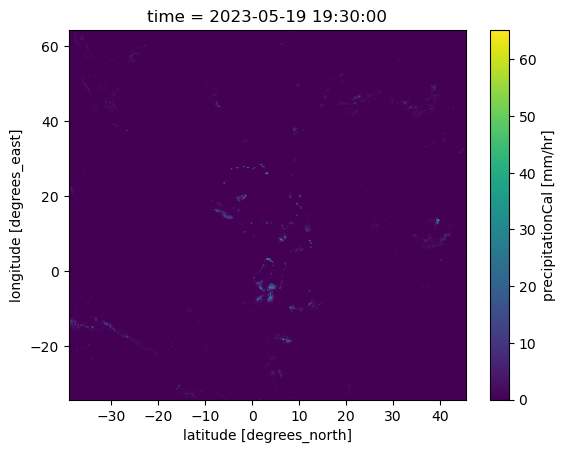

In [151]:
rd_file.precipitationCal.plot()

In [18]:
path_to_data = '/home/datascience/New_IMERG/2018/' 

datasets = xr.open_mfdataset(path_to_data+"*.nc")

In [19]:
year_2018 = datasets.sel(lat=slice(4,27),lon=slice(-17,27))

In [20]:
path_to_data = '/home/datascience/New_IMERG/2017/' 

datasets = xr.open_mfdataset(path_to_data+"*.nc")
year_2017 = datasets.sel(lat=slice(4,27),lon=slice(-17,27))

In [24]:
year_2017

<xarray.Dataset>
Dimensions:           (time: 17515, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2017-01-01 00:00:00 ... 2017-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-15 18:33:24 GMT Hyrax-1.16.3 htt...

In [25]:
path_to_data = '/home/datascience/New_IMERG/2016/' 

datasets = xr.open_mfdataset(path_to_data+"*.nc")
year_2016 = datasets.sel(lat=slice(4,27),lon=slice(-17,27))

In [26]:
path_to_data = '/home/datascience/New_IMERG/2015/' 

datasets = xr.open_mfdataset(path_to_data+"*.nc")
year_2015 = datasets.sel(lat=slice(4,27),lon=slice(-17,27))

In [23]:
year_2021

<xarray.Dataset>
Dimensions:           (time: 17519, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2021-01-01 00:00:00 ... 2021-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-20 09:17:33 GMT Hyrax-1.16.3 htt...

In [16]:
year_2020 

<xarray.Dataset>
Dimensions:           (time: 17567, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2020-01-01 00:00:00 ... 2020-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-19 09:31:41 GMT Hyrax-1.16.3 htt...

In [17]:
year_2019

<xarray.Dataset>
Dimensions:           (time: 17516, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2019-01-01 00:00:00 ... 2019-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-18 10:50:40 GMT Hyrax-1.16.3 htt...

In [142]:
year_2015

<xarray.Dataset>
Dimensions:           (time: 17518, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2015-01-01 00:00:00 ... 2015-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-12 15:05:31 GMT Hyrax-1.16.3 htt...

In [3]:
year_2016

NameError: name 'year_2016' is not defined

In [47]:
year_2017

<xarray.Dataset>
Dimensions:           (time: 17515, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2017-01-01 00:00:00 ... 2017-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-15 18:33:24 GMT Hyrax-1.16.3 htt...

In [48]:
year_2018

<xarray.Dataset>
Dimensions:           (time: 17518, lon: 440, lat: 230)
Coordinates:
  * lat               (lat) float32 4.05 4.15 4.25 4.35 ... 26.75 26.85 26.95
  * lon               (lon) float32 -16.95 -16.85 -16.75 ... 26.75 26.85 26.95
  * time              (time) object 2018-01-01 00:00:00 ... 2018-12-31 23:30:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 440, 230), meta=np.ndarray>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH-L/06;\nDOIau...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-12-17 11:45:56 GMT Hyrax-1.16.3 htt...

In [32]:
with dask.config.set({'array.slicing.split_large_chunks': True}):
    years_data = xr.merge([year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021])

In [ ]:
data_values = years_data.precipitationCal.compute()

In [60]:
data_values

<xarray.DataArray 'precipitationCal' (time: 105200, lon: 440, lat: 230)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [3.6639620e-05, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [2.5902418e-04, 2.9276425e-04, 1.1696479e-03, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.05 4.15 4.25 4.35 4.45 ... 26.65 26.75 26.85 26.95
  * lon      (lon) float32 -16.95 -16.85 -16.75 -16.65 ... 26.75 26.85 26.95
  * time     (time) object 2015-01-01 00:00:00 ... 2020-12-31 23:30:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    origname:          precipitationCal
    fullnamepath:      /Grid/precipitationCal
    coordinates:       Grid_time Grid_lon Grid_lat

In [ ]:
import numpy as np

In [ ]:
np.savez('/home/datascience/data_2015_2021.npz', numpy_array=data_values)

In [103]:
loaded_data = np.load('/home/datascience/data_2015_2020.npz')

In [104]:
data_array = loaded_data['numpy_array']

In [105]:
data_values = data_array

In [106]:
def train_test():
    #data_values = west_africa.precipitationCal.compute()
    precip_data = np.expand_dims(data_values, axis=-1)
    # where  '3' is the length of timestep we want to predict
    indx = np.arange(0, precip_data.shape[0], 9+3)
    X = [precip_data[indx[i]:indx[i+1] - 3, :, :, 0] for i in range(len(indx)-1)]
    X = np.expand_dims(X, axis=-1)
    
    Y = [precip_data[indx[i+1]-3:indx[i+1], :, :,0] for i in range(len(indx)-1)]
    Y =  np.expand_dims(Y, axis=-1)
   
    Y =  np.expand_dims(Y, axis=-1)
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    
    percentage = np.array([(X_train[i, 0].squeeze()>1).mean()*100 for i in range(X_train.shape[0])])
    percentage_valid = np.array([(X_valid[i, 0].squeeze()>1).mean()*100 for i in range(X_valid.shape[0])])
    
    print(X_train.shape, y_train.shape), print(X_valid.shape, y_valid.shape)
    
    return X_train[percentage>1], X_valid[percentage_valid>1],y_train[percentage>1], y_valid[percentage_valid>1]


X_train, X_valid, y_train, y_valid = train_test()

(7012, 9, 440, 230, 1) (7012, 3, 440, 230, 1, 1)
(1754, 9, 440, 230, 1) (1754, 3, 440, 230, 1, 1)


In [107]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, Flatten, Dense,Conv2D,ConvLSTM2D
from tensorflow.keras.models import Model

In [108]:
def conv3d_onego_prediction(input_shape):    # Samuel, which of the algorithms is this?
    inputs = Input(shape=(input_shape))

   
    x = ConvLSTM2D(filters=48, kernel_size=(3,3), padding="same", activation='relu', return_sequences=True)(inputs)
    x = Conv3D(48, [3, 1, 1], activation='relu')(x)
        
    x = ConvLSTM2D(filters=int(48/2), kernel_size=(3,3), padding="same", activation='relu', return_sequences=True)(x)
    x = Conv3D(int(24), [3, 1, 1], activation='relu')(x)
        
    x = ConvLSTM2D(filters=int(48/4), kernel_size=(3,3), padding="same", activation='relu', return_sequences=True)(x)
    x = Conv3D(int(12), [3, 1, 1], activation='relu')(x)
        
    x = Conv3D(1, [1, 1, 1], padding='same', activation='relu')(x)    
    model = Model(inputs=inputs, outputs=x)
    return model



In [109]:
num_input_steps, lon, lat, channels = X_train.shape[1:]
num_input_steps,lon, lat, channels

(9, 440, 230, 1)

In [110]:
input_shape = (num_input_steps,lon, lat, channels)
model = conv3d_onego_prediction(input_shape)

In [111]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [112]:
learning_rate = 1e-3
optimizer = Adam(learning_rate=learning_rate)

loss = 'mse'  

model.compile(optimizer=optimizer, loss=loss, metrics=['mse', 'mae','accuracy'])

In [113]:
# Print the model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 9, 440, 230, 1)   0         
                             ]                                   
                                                                 
 conv_lstm2d_12 (ConvLSTM2D  (None, 9, 440, 230, 48)   84864     
 )                                                               
                                                                 
 conv3d_16 (Conv3D)          (None, 7, 440, 230, 48)   6960      
                                                                 
 conv_lstm2d_13 (ConvLSTM2D  (None, 7, 440, 230, 24)   62304     
 )                                                               
                                                                 
 conv3d_17 (Conv3D)          (None, 5, 440, 230, 24)   1752      
                                                           

In [115]:
!nvidia-smi

Sat May 18 09:48:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A10                     Off |   00000000:00:04.0 Off |                    0 |
|  0%   30C    P8             15W /  150W |       0MiB /  23028MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [116]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [117]:
# Train the modeldd
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.2)

Epoch 1/30
654/654 [==============================] - 2257s 3s/step - loss: 0.6688 - mse: 0.6688 - mae: 0.1370 - accuracy: 0.8742 - val_loss: 0.5984 - val_mse: 0.5984 - val_mae: 0.1162 - val_accuracy: 0.8755
Epoch 2/30
654/654 [==============================] - 2255s 3s/step - loss: 0.6280 - mse: 0.6279 - mae: 0.1281 - accuracy: 0.8742 - val_loss: 0.5834 - val_mse: 0.5834 - val_mae: 0.1158 - val_accuracy: 0.8759
Epoch 3/30
654/654 [==============================] - 2259s 3s/step - loss: 0.6173 - mse: 0.6173 - mae: 0.1277 - accuracy: 0.8746 - val_loss: 0.5882 - val_mse: 0.5882 - val_mae: 0.1320 - val_accuracy: 0.8736
Epoch 4/30
654/654 [==============================] - 2259s 3s/step - loss: 0.6077 - mse: 0.6077 - mae: 0.1273 - accuracy: 0.8748 - val_loss: 0.5689 - val_mse: 0.5689 - val_mae: 0.1155 - val_accuracy: 0.8763
Epoch 5/30
654/654 [==============================] - 2259s 3s/step - loss: 0.6030 - mse: 0.6030 - mae: 0.1262 - accuracy: 0.8750 - val_loss: 0.5680 - val_mse: 0.5680 -

In [118]:
import tensorflow as tf 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.test.is_built_with_cuda())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12679738416999718253
xla_global_id: -1
]
False


In [34]:
model.save('/home/datascience/convlstm.keras')

NameError: name 'model' is not defined

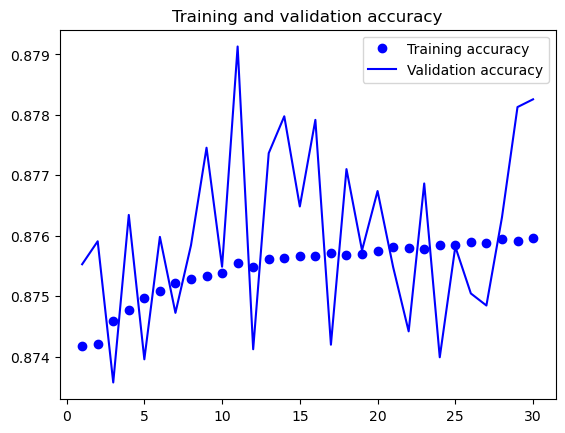

In [120]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

In [121]:
X_valid.shape

(1019, 9, 440, 230, 1)

In [122]:
#Selecting first 9 timesteps of X_Valid for prediction
test_data_X = np.expand_dims(X_valid[0],0)
test_data_X.shape  #test_data_X

(1, 9, 440, 230, 1)

In [123]:
y_valid.shape

(1019, 3, 440, 230, 1, 1)

In [124]:
#Selecting y_Valid of first 9 timesteps
test_data_y = np.expand_dims(y_valid[0],0)
test_data_y.shape

(1, 3, 440, 230, 1, 1)

In [125]:
test_data_y = test_data_y[0][:]

In [126]:
test_data_y.shape

(3, 440, 230, 1, 1)

## Predicting

In [127]:
new_pred = model.predict(test_data_X)


1/1 [==============================] - 1s 563ms/step


In [128]:
new_pred.shape

(1, 3, 440, 230, 1)

In [129]:
new_pred.shape

(1, 3, 440, 230, 1)

In [130]:
new_pred = new_pred[0][:]

In [131]:
new_pred[0].shape

(440, 230, 1)

In [132]:
#Accuracy of model (r2_score)
from sklearn.metrics import r2_score
for i in range(3):
    pred = new_pred[i]
    valid_y = np.reshape(test_data_y[i], (440, 230, 1))
    score = r2_score(valid_y.reshape(-1),pred.reshape(-1))
    print(f'{(i+1)*30} min r2_score _ _ _ _ {score}')
    

30 min r2_score _ _ _ _ 0.5576460154230816
60 min r2_score _ _ _ _ 0.6791488620131563
90 min r2_score _ _ _ _ 0.34048485227640124


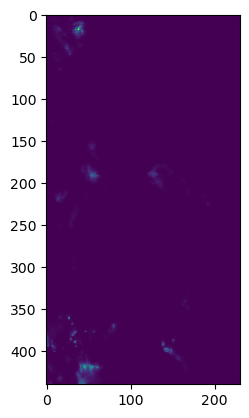

In [133]:
plt.imshow(new_pred[1])

In [134]:
test_data_y[0].shape

(440, 230, 1, 1)

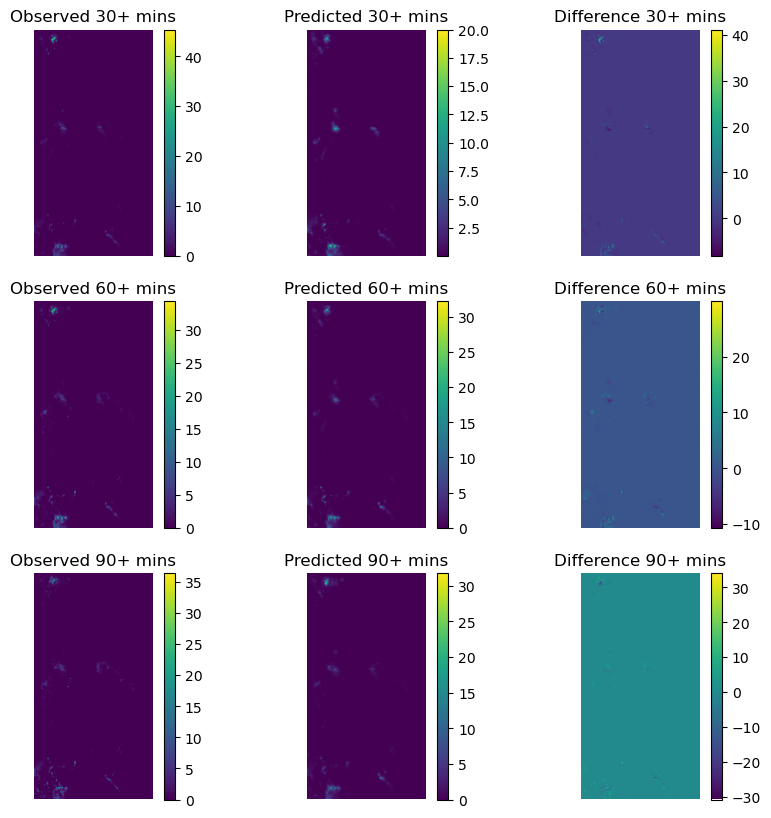

In [135]:
# Construct a figure for the original and new frames.
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[:,0]):
    plot=ax.imshow(np.reshape(test_data_y[idx], (440, 230, 1)))
    ax.set_title(f"Observed {(idx + 1)*30}+ mins")
    ax.axis("off")
    plt.colorbar(plot)

# Plot the new frames.
for idx, ax in enumerate(axes[:,1]):
    plot=ax.imshow(new_pred[idx])
    ax.set_title(f"Predicted {(idx + 1)*30}+ mins")
    ax.axis("off")
    plt.colorbar(plot)
    
for idx, ax in enumerate(axes[:,2]):
    plot=ax.imshow(np.reshape(test_data_y[idx], (440, 230, 1))-new_pred[idx])
    ax.set_title(f"Difference {(idx + 1)*30}+ mins")
    ax.axis("off")
    plt.colorbar(plot)

# Display the figure.
plt.show()

In [136]:
np.squeeze(new_pred[0]).shape

(440, 230)

In [139]:
sub_month = datasets.sel(time=slice('2016-01-01','2016-03-31'))
west_africa = sub_month.sel(lat=slice(4,27),lon=slice(-17,27))
west_africa.precipitationCal[:]
latitude = west_africa.lat
longitude = west_africa.lon

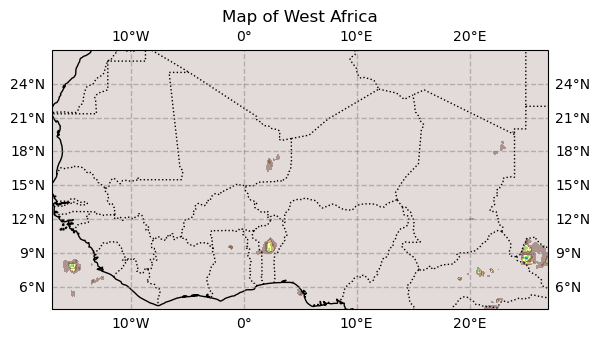

In [140]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
plt.contourf(longitude, latitude, np.squeeze(new_pred[0]).T, transform=ccrs.PlateCarree(), cmap='terrain_r')

# Add coastlines and borders
ax.coastlines()
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')

# You can add more features such as rivers, lakes, etc., if needed

# Add title and show the map
plt.title('Map of West Africa')
plt.show()

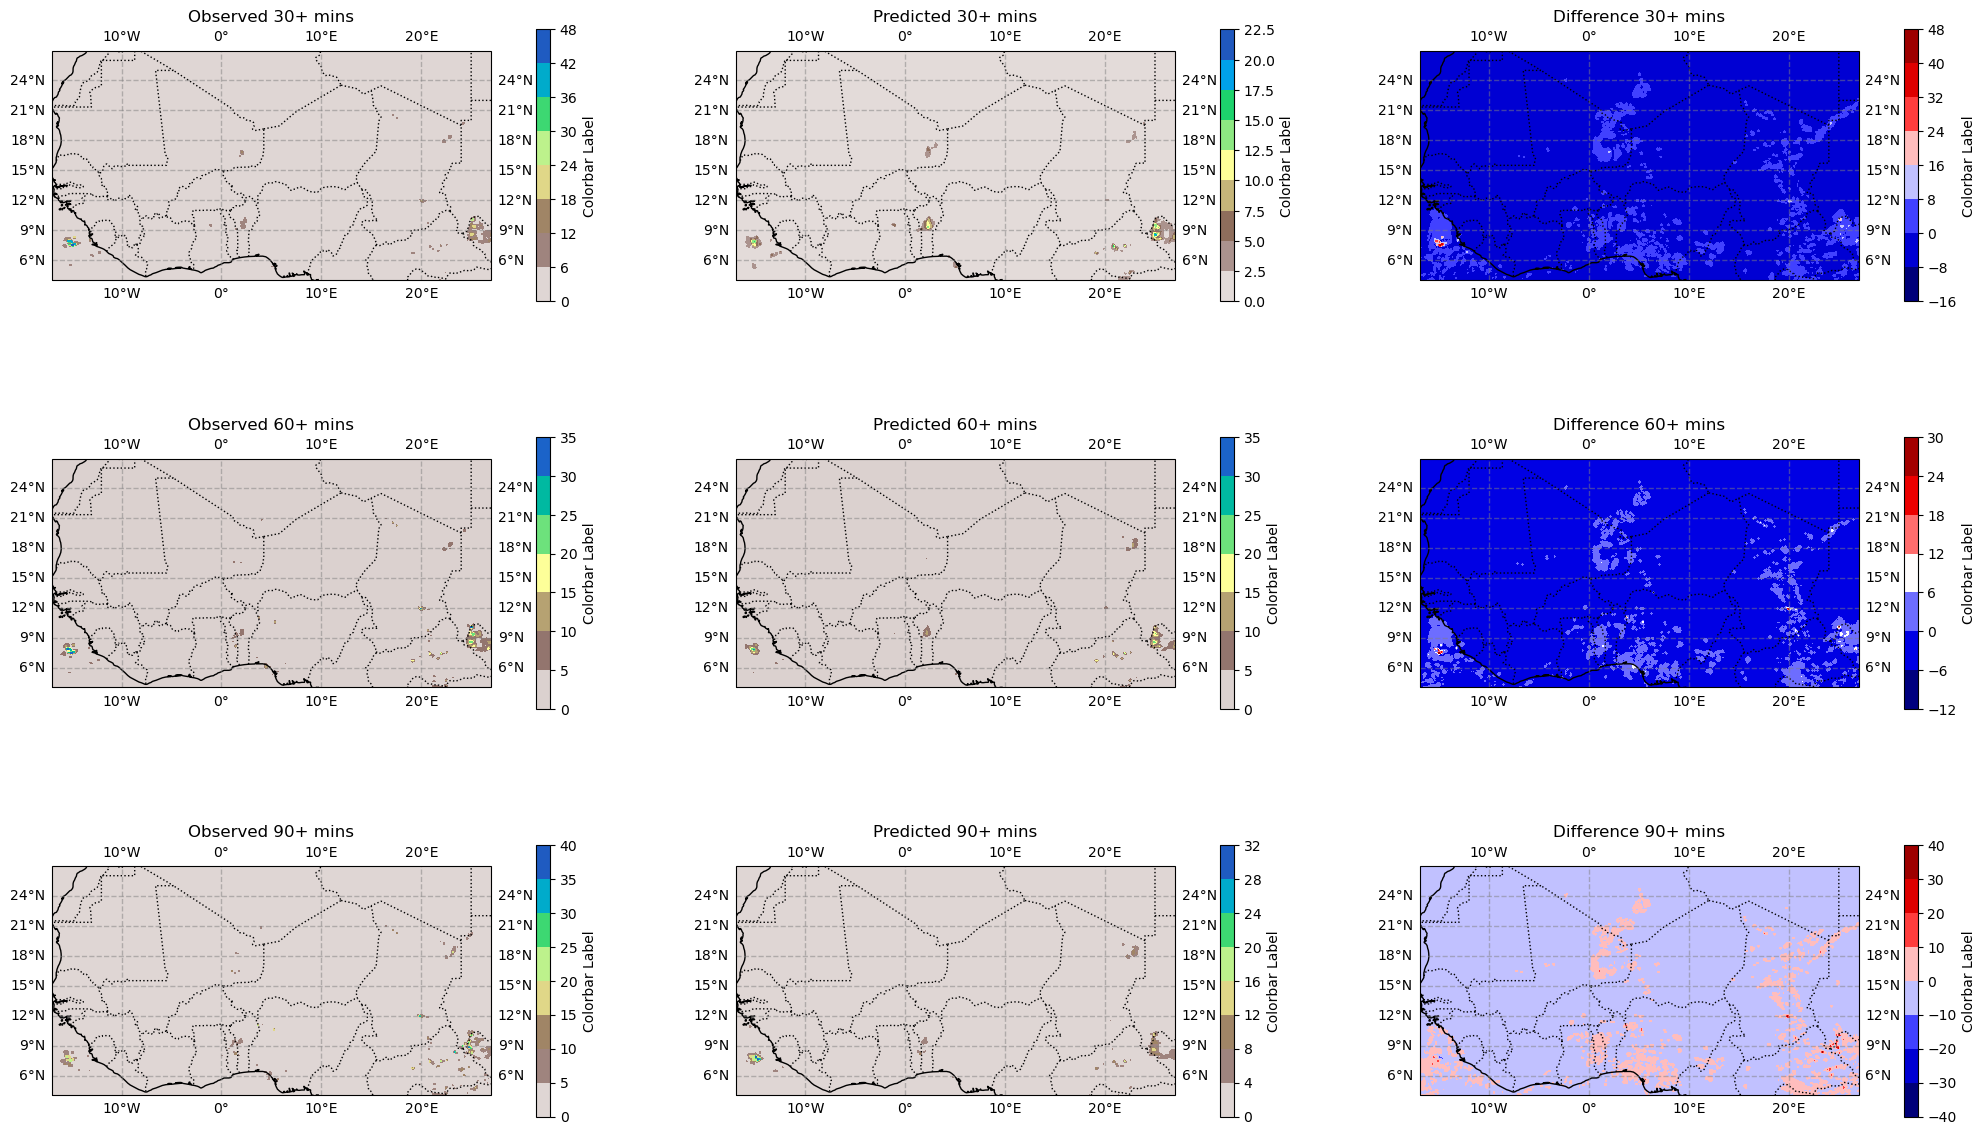

In [141]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_map(data, title, longitude, latitude, ax=None, colormap=None,vmax=None,vmin=None):
    if ax is None:
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8, 6))
    contour = ax.contourf(longitude, latitude, np.squeeze(data).T, transform=ccrs.PlateCarree(), cmap=colormap,vmax=vmax, vmin=vmin)

    # Add coastlines and borders
    ax.coastlines()
    ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, color='lightgray')
    
    # Add title
    ax.set_title(title)
    cbar = plt.colorbar(contour, ax=ax, orientation='vertical', shrink=0.8, pad=0.08)
    cbar.set_label('Colorbar Label')  

    return contour
 
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(25, 15), subplot_kw={'projection': ccrs.PlateCarree()})

contours = []
# Plot the original frames.
for idx, ax in enumerate(axes[:, 0]):
    contours.append(plot_map(np.reshape(test_data_y[idx], (440, 230, 1)), f"Observed {(idx + 1)*30}+ mins", longitude, latitude, ax, colormap='terrain_r',))
    
# each plot sgould have its own colorbar for the individual plot
# Plot the new frames.
for idx, ax in enumerate(axes[:, 1]):
    plot_map(new_pred[idx], f"Predicted {(idx + 1)*30}+ mins", longitude, latitude, ax, colormap='terrain_r')

# Plot the difference frames.
for idx, ax in enumerate(axes[:, 2]):
    plot_map(np.reshape(test_data_y[idx], (440, 230, 1))-new_pred[idx], f"Difference {(idx + 1)*30}+ mins", longitude, latitude, ax, colormap='seismic')

# Adjust layout
#plt.tight_layout()

# Show the figure.
plt.show()
